In [8]:
import numpy as np
import gym
import or_gym
import matplotlib.pyplot as plt
%matplotlib inline


# For this assignment, you will train a reinforcement learning agent to solve the Bounded Knapsack problem with 200 items
env = or_gym.make('Knapsack-v2', max_weight=300, mask=False)

In [10]:
from stable_baselines3 import A2C
import torch as th

# Hyperparameters
max_episode_steps = 2000
total_timesteps = 100000
gamma = 0.99
lr = 0.0003

policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[128, 128]) # 2 hidden layers with 32 neurons each


model = A2C("MlpPolicy", env, learning_rate=lr, gamma = gamma, use_rms_prop = True, vf_coef = 0.6, ent_coef = 0.01,
            normalize_advantage= True,  policy_kwargs = policy_kwargs, verbose = 0,  tensorboard_log="model/A2C_Knapsack_tensorboard/")


model.learn(total_timesteps=total_timesteps, log_interval=1000, tb_log_name="A2C_Knapsack")
model.save(f'A2C_Best_{total_timesteps}')

In [11]:
theta = []
omega = []
rewards = []
cum_rew = 0
cum_rewards = []


# Simulating the agent
obs = env.reset()

try:
    for _ in range(100):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        cum_rew += reward
        cum_rewards.append(cum_rew)
        # print(obs)
        # print(reward)
finally:
    env.close()

print("Rewards: ", rewards)
print("Cumulative Rewards: ", cum_rewards)

Rewards:  [68, 68, 68, 68, 68, 68, 68, 68, 99, 99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cumulative Rewards:  [68, 136, 204, 272, 340, 408, 476, 544, 643, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742, 742]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


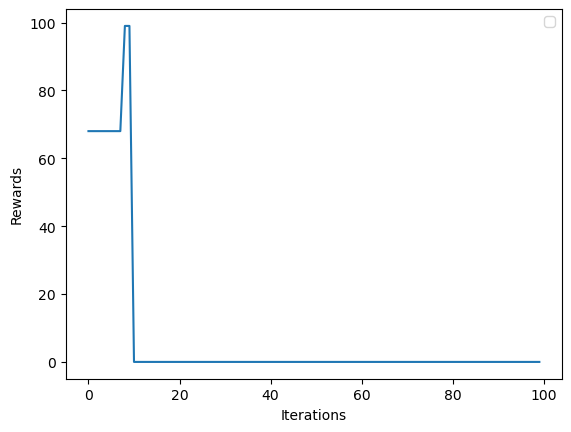

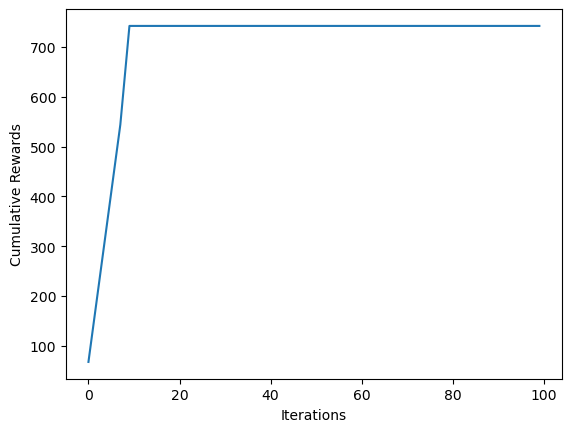

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Rewards')
plt.show()